# Importance-Sampling

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 期望分布

设$P(x)=3 e^{-\frac{x^2}{2}}+e^{-\frac{(x-4)^2}{2}}$为样本的分布。注意，这是一个非标准化的分布有一个我们可以计算的标准化常数$Z$，但我们保持它的原样。
$(Z \approx 10.0261955464)$

In [3]:
P = lambda x:3*np.exp(-x*x/2)+np.exp(-(x-4)**2/2)
Z = 10.0261955464

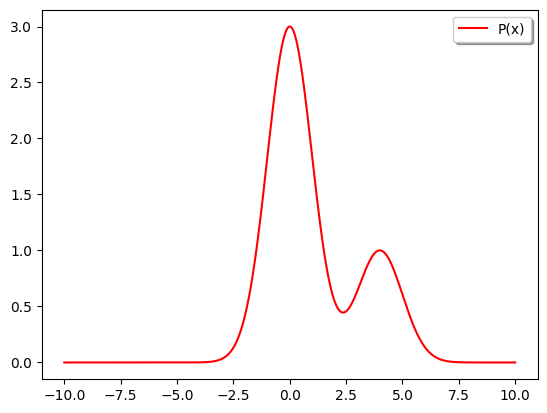

In [4]:
x_values = np.linspace(-10, 10, 1000)
y_vals = P(x_values)
plt.figure(1)
plt.plot(x_values, y_vals, 'r', label="P(x)")
plt.legend(loc="upper right", shadow=True)
plt.show()


让我们想要近似的函数$f(x)=x$和$g(x)=sin(x)$。 非规格化P的两个值如下   

- $\mathbb{E}[x] \approx 10.02686647165$
- $\mathbb{E}[\sin (x)] \approx-1.15088010640$

In [5]:
f_x = lambda x: x
g_x = lambda x: np.sin(x)
true_expected_fx = 10.02686647165
true_expected_gx = -1.15088010640

## 重要性采样
$$\mathbb{E}_{x \sim P}[f(x)]=\mathbb{E}_{x \sim Q}\left[f(x) \frac{P(x)}{Q(x)}\right]$$
这意味着 $\mathbb{E}_{x \sim P}[f(x)] \approx \frac{1}{n} \sum_{i=1}^n f\left(x_i\right) \frac{P\left(x_i\right)}{Q\left(x_i\right)}$ 其中 $x_i$ 是从 $Q$ 中抽取的。这适用于P和Q都归一化的情况。对于非标准化情况
$$\mathbb{E}_{x \sim P}[f(x)] \approx \frac{\sum_{i=1}^n f\left(x_i\right) \frac{P\left(x_i\right)}{Q\left(x_i\right)}}{\sum_{i=1}^n \frac{P\left(x_i\right)}{Q\left(x_i\right)}}$$


设proposal分布Q(x)为[-4,8]中的均匀分布$Q(x)=\frac{1}{8+4} \text { for } x \in[-4,8]$

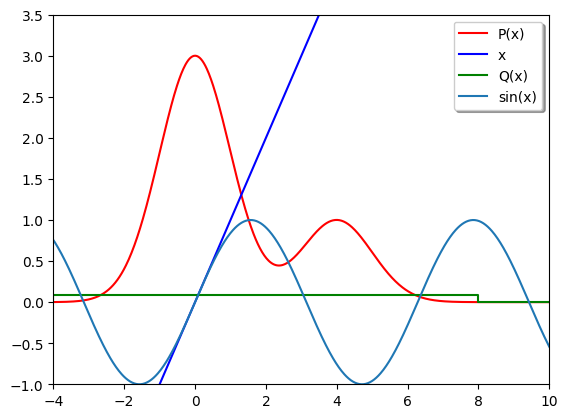

In [7]:
a, b = -4, 8
uniform_prob = 1./(b - a)
plt.figure(2)
plt.plot(x_values, y_vals, 'r', label='P(x)')
plt.plot(x_values, f_x(x_values), 'b', label='x')
plt.plot([-10, a, a, b, b, 10], [0, 0, uniform_prob, uniform_prob, 0, 0], 'g', label='Q(x)')
plt.plot(x_values, np.sin(x_values), label='sin(x)')
plt.xlim(-4, 10)
plt.ylim(-1, 3.5)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [8]:
expected_f_x = 0.
expected_g_x = 0.
n_samples = 100000
den = 0.

for i in range(n_samples):
    sample = np.random.uniform(a, b)
    importance = P(sample)/uniform_prob
    den +=importance
    expected_f_x += importance*f_x(sample)
    expected_g_x += importance*g_x(sample)

expected_f_x /= den
expected_g_x /= den
expected_f_x *= Z
expected_g_x *= Z
print('E[f(x)] = %.5f, Error = %.5f' % (expected_f_x, abs(expected_f_x - true_expected_fx)))
print('E[g(x)] = %.5f, Error = %.5f' % (expected_g_x, abs(expected_g_x - true_expected_gx)))

E[f(x)] = 10.14770, Error = 0.12083
E[g(x)] = -1.20582, Error = 0.05494
